In [1]:
import gymnasium as gym

In [2]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

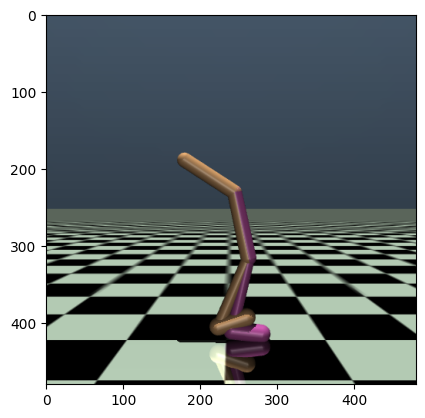

In [5]:
env = gym.make('Walker2d-v4', render_mode="rgb_array")

observation, info = env.reset()
frames = []
img = plt.imshow(env.render()) # only call this once
ep = 0
for _ in range(1000):
    # frames.append(env.render())
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
        ep += 1
        if ep > 5:
            break

env.close()

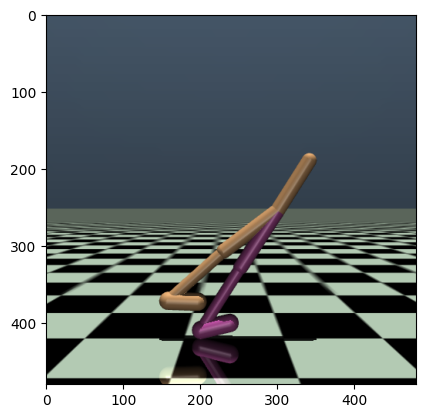

In [15]:
import torch
import core
import imageio

state = torch.load('models/epoch-49.pt')
ac = core.MLPActorCritic(env.observation_space, env.action_space, **state['ac_kwargs'])
ac.load_state_dict(state['ac'])

env = gym.make('Walker2d-v4', render_mode="rgb_array")

o, info = env.reset()
frames = []
img = plt.imshow(env.render()) # only call this once
ep = 0
for _ in range(1000):
    # frames.append(env.render())
    data = env.render()
    img.set_data(data) # just update the data
    frames.append(data)
    display.display(plt.gcf())
    display.clear_output(wait=True)
#     action = env.action_space.sample()  # agent policy that uses the observation and info
    a, v, logp = ac.step(torch.as_tensor(o, dtype=torch.float32))
    observation, reward, terminated, truncated, info = env.step(a)

    if terminated or truncated:
        observation, info = env.reset()
        ep += 1
        if ep > 0:
            break
env.close()

In [16]:
imageio.mimsave('2d-walker.gif', frames)